In [1]:
import os, sys, h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('/home/nexus-admin/NEXUS_RF/BackendTools')
import ResonanceFitResult as fit

### Read in data

In [2]:
def fits_to_csv(series_list, datapath):
    #Store values in dataframe
    freq_df = pd.DataFrame()
    Qr_df = pd.DataFrame()
    Qi_df = pd.DataFrame()
    Qc_df = pd.DataFrame()
    
    #loop through series, pull data from each file
    for i in range (0, len(series_list)):
        
        #Specific filepath, check that it exists
        fullpath = datapath + "out_" + series_list[i]
        filename = "ResonanceFits_"+series_list[i]+".h5"
        if not os.path.exists(fullpath):
            exit("Error: invalid filepath")

        #Pull data into SeriesFitResult object
        try:
            fdata = fit.decode_hdf5(os.path.join(fullpath,filename))
        except:
            print("Problem with file:",os.path.join(fullpath,filename))
            print("Skipping...")
            continue

        #Append series data as row... (messy way of doing this but it works so it's fine for now)
        freq_df = freq_df.append(pd.DataFrame(np.array([fdata.fit_fr]),columns=([fdata.powers])).set_index([[fdata.series]]))
        Qr_df = Qr_df.append(pd.DataFrame(np.array([fdata.fit_Qr]),columns=([fdata.powers])).set_index([[fdata.series]]))
        Qi_df = Qi_df.append(pd.DataFrame(np.array([fdata.fit_Qi]),columns=([fdata.powers])).set_index([[fdata.series]]))
        Qc_df = Qc_df.append(pd.DataFrame(np.array([fdata.fit_Qc]),columns=([fdata.powers])).set_index([[fdata.series]]))

        #Save to csv
        #okay so writing to csv files is the right thing to do
            #but I've got an irrational fear of creating an absurd amount of files, trying to delete one
            #and accidentally deleting data.  So this is going to stay commented out for a few days
        #freq_df.to_csv(path_or_buf="")
        #Qr_df.to_csv(path_or_buf="")
        #Qi_df.to_csv(path_or_buf="")
        #Qc_df.to_csv(path_or_buf="")
        
    return(freq_df, Qr_df, Qi_df, Qc_df)

### main

In [3]:
#Specify series
series_list = [
"20220417_195127",
"20220417_201631",
"20220417_202641",
"20220417_203605",
"20220417_204109",
"20220417_204429",
"20220417_204734",
"20220417_205034",
"20220417_205655",
"20220417_210100",
"20220417_210238",
"20220417_210421",
"20220417_210600",
"20220417_210739",
"20220417_210921",
"20220417_211057",
"20220417_211234",
"20220417_211419",
"20220417_211558",
"20220417_211810",
"20220417_211950",
"20220417_212126",
"20220417_212309",
"20220417_212450",
"20220417_212627",
"20220417_212804",
"20220417_212943",
"20220417_213119",
"20220417_213302",
"20220417_213946",
"20220417_214318"
]

Al = ["20220417_210100",
"20220417_210238",
"20220417_210421",
"20220417_210600",
"20220417_210739",
"20220417_210921",
"20220417_211057",
"20220417_211234",
"20220417_211419",
"20220417_211558",
"20220417_195127",
"20220417_201631",
#"20220417_202641", #commented out because too much data to visualize
#"20220417_203605",
#"20220417_204109",
#"20220417_204429",
#"20220417_204734",
#"20220417_205034",
#"20220417_213946"
]

Nb7 = ["20220417_205655",
"20220417_211810",
"20220417_211950",
"20220417_212126",
"20220417_212309",
"20220417_212450",
"20220417_212627",
"20220417_212804",
"20220417_212943",
"20220417_213119",
"20220417_213302",
"20220417_214318"
]

print("Num series: ", len(series_list))


#Set datapath, check that it exists
datapath = "/data/ProcessedOutputs/"
if not os.path.exists(datapath):
    exit("Error: invalid datapath")
    

#Read data into csv
freq_df, Qr_df, Qi_df, Qc_df = fits_to_csv(series_list, datapath)
freq_df.head()


Num series:  31


,-50.0,-48.0,-47.5,-46.0,-45.0,-44.0,-42.5,-42.0,-40.0,-38.0,...,-32.0,-30.0,-28.0,-27.5,-26.0,-25.0,-24.0,-22.5,-22.0,-20.0
20220417_195127,4.242181,4.242181,NaN,4.242181,NaN,4.242181,NaN,4.242181,4.242181,4.242181,...,4.24218,4.24218,4.24218,NaN,4.242179,NaN,4.242179,NaN,4.242179,4.242178
20220417_201631,4.242181,4.242181,NaN,4.242181,NaN,4.242181,NaN,4.242181,4.242181,4.242181,...,4.24218,4.24218,4.24218,NaN,4.242179,NaN,4.242179,NaN,4.242178,4.242178
20220417_202641,4.242181,4.242181,NaN,4.242181,NaN,4.242181,NaN,4.242181,4.242181,4.242181,...,4.24218,4.24218,4.24218,NaN,4.242179,NaN,4.242179,NaN,4.242179,4.242178
20220417_203605,4.242181,4.242181,NaN,4.242181,NaN,4.242181,NaN,4.242181,4.242181,4.242181,...,4.24218,4.24218,4.24218,NaN,4.242179,NaN,4.242179,NaN,4.242179,4.242178
20220417_204109,4.242181,4.242181,NaN,4.242181,NaN,4.242181,NaN,4.242181,4.242181,4.242181,...,4.24218,4.24218,4.24218,NaN,4.242179,NaN,4.242179,NaN,4.242179,4.242178


### Frequency

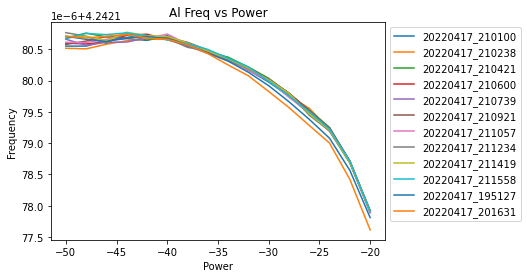

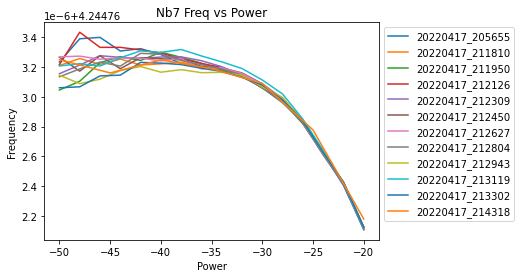

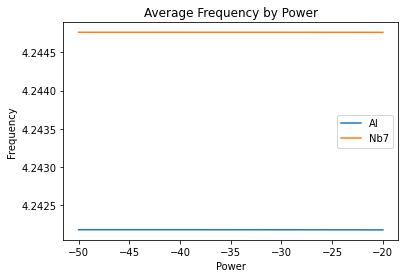

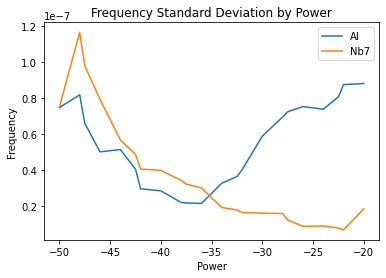

In [4]:
#Plot Al (index resetting isn't very pretty, but it's necessary for interpolation)
freq_df.T.reset_index().set_index('level_0').interpolate(method='index').plot(y=Al)
plt.xlabel("Power")
plt.ylabel("Frequency")
plt.title("Al Freq vs Power")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

#Plot Nb7
freq_df.T.reset_index().set_index('level_0').interpolate(method='index').plot(y=Nb7)
plt.xlabel("Power")
plt.ylabel("Frequency")
plt.title("Nb7 Freq vs Power")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

#plot averages
ax = freq_df.loc[Al].describe().T.reset_index().set_index('level_0').interpolate().plot(y='mean', label='Al')
freq_df.loc[Nb7].describe().T.reset_index().set_index('level_0').interpolate().plot(ax=ax, y='mean', label = 'Nb7')
plt.legend(loc='best')
plt.xlabel("Power")
plt.ylabel("Frequency")
plt.title("Average Frequency by Power")
plt.show()

#plot std
ax = freq_df.loc[Al].describe().T.reset_index().set_index('level_0').interpolate().plot(y='std', label='Al')
freq_df.loc[Nb7].describe().T.reset_index().set_index('level_0').interpolate().plot(ax=ax, y='std', label = 'Nb7')
plt.legend(loc='best')
plt.xlabel("Power")
plt.ylabel("Frequency")
plt.title("Frequency Standard Deviation by Power")
plt.show()

### Total Quality Factor

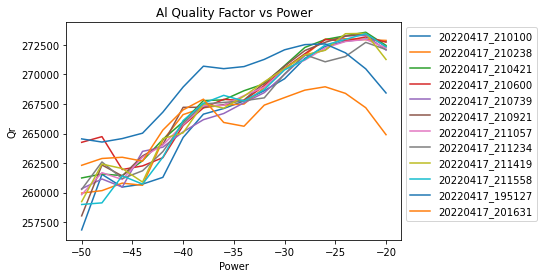

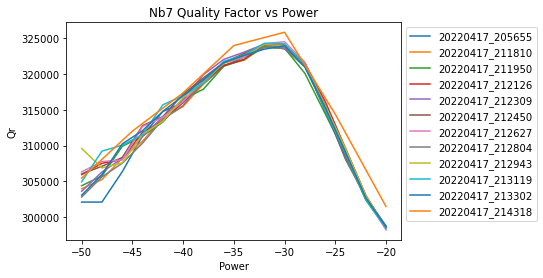

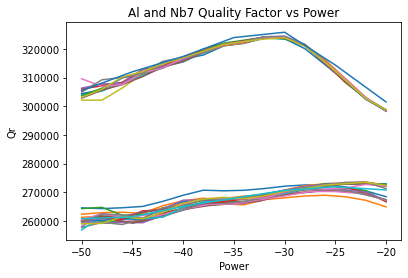

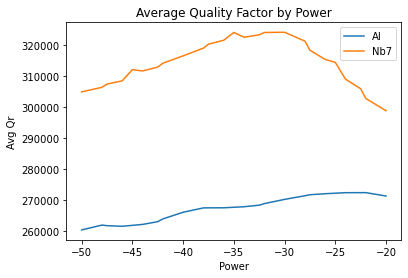

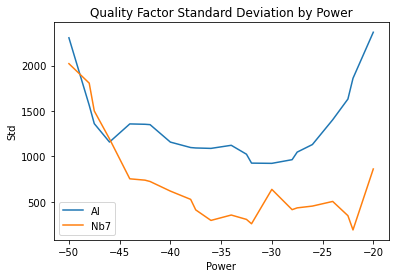

In [5]:
#plot Al
Qr_df.T.reset_index().set_index('level_0').interpolate(method='index').plot(y=Al)
plt.xlabel("Power")
plt.ylabel("Qr")
plt.title("Al Quality Factor vs Power")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

#plot Nb
Qr_df.T.reset_index().set_index('level_0').interpolate(method='index').plot(y=Nb7)
plt.xlabel("Power")
plt.ylabel("Qr")
plt.title("Nb7 Quality Factor vs Power")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

#Plot both
Qr_df.T.reset_index().set_index('level_0').interpolate(method='index').plot(legend=None)
plt.xlabel("Power")
plt.ylabel("Qr")
plt.title("Al and Nb7 Quality Factor vs Power")
plt.show()

#plot averages
ax = Qr_df.loc[Al].describe().T.reset_index().set_index('level_0').interpolate().plot(y='mean', label='Al')
Qr_df.loc[Nb7].describe().T.reset_index().set_index('level_0').interpolate().plot(ax=ax, y='mean', label = 'Nb7')
plt.legend(loc='best')
plt.xlabel("Power")
plt.ylabel("Avg Qr")
plt.title("Average Quality Factor by Power")
plt.show()

#plot std
ax = Qr_df.loc[Al].describe().T.reset_index().set_index('level_0').interpolate().plot(y='std', label='Al')
Qr_df.loc[Nb7].describe().T.reset_index().set_index('level_0').interpolate().plot(ax=ax, y='std', label = 'Nb7')
plt.legend(loc='best')
plt.xlabel("Power")
plt.ylabel("Std")
plt.title("Quality Factor Standard Deviation by Power")
plt.show()

### Internal Quality Factor

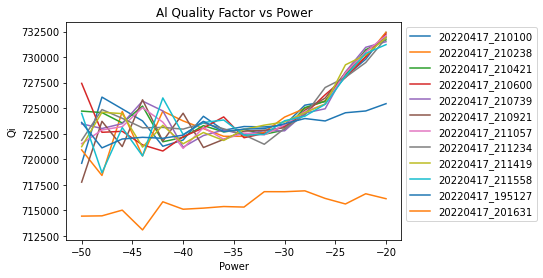

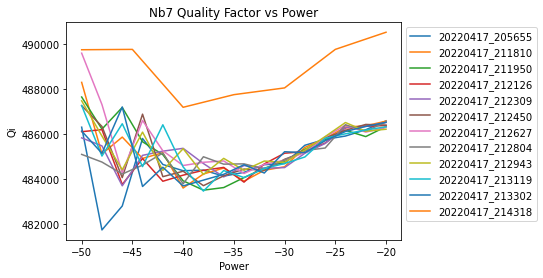

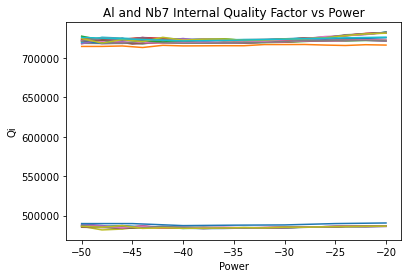

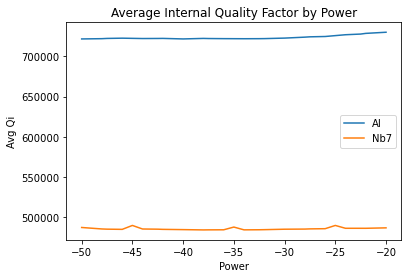

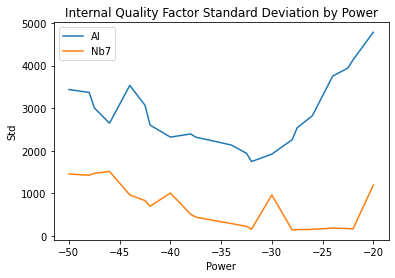

In [6]:
#plot Al
Qi_df.T.reset_index().set_index('level_0').interpolate(method='index').plot(y=Al)
plt.xlabel("Power")
plt.ylabel("Qi")
plt.title("Al Quality Factor vs Power")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

#plot Nb
Qi_df.T.reset_index().set_index('level_0').interpolate(method='index').plot(y=Nb7)
plt.xlabel("Power")
plt.ylabel("Qi")
plt.title("Nb7 Quality Factor vs Power")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

#plot both
Qi_df.T.reset_index().set_index('level_0').interpolate(method='index').plot(legend=None)
plt.xlabel("Power")
plt.ylabel("Qi")
plt.title("Al and Nb7 Internal Quality Factor vs Power")
plt.show()

#plot averages
ax = Qi_df.loc[Al].describe().T.reset_index().set_index('level_0').interpolate().plot(y='mean', label='Al')
Qi_df.loc[Nb7].describe().T.reset_index().set_index('level_0').interpolate().plot(ax=ax, y='mean', label = 'Nb7')
plt.legend(loc='best')
plt.xlabel("Power")
plt.ylabel("Avg Qi")
plt.title("Average Internal Quality Factor by Power")
plt.show()

#plot std
ax = Qi_df.loc[Al].describe().T.reset_index().set_index('level_0').interpolate().plot(y='std', label='Al')
Qi_df.loc[Nb7].describe().T.reset_index().set_index('level_0').interpolate().plot(ax=ax, y='std', label = 'Nb7')
plt.legend(loc='best')
plt.xlabel("Power")
plt.ylabel("Std")
plt.title("Internal Quality Factor Standard Deviation by Power")
plt.show()

### Coupling Quality Factor

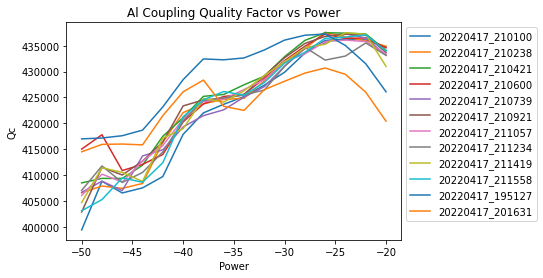

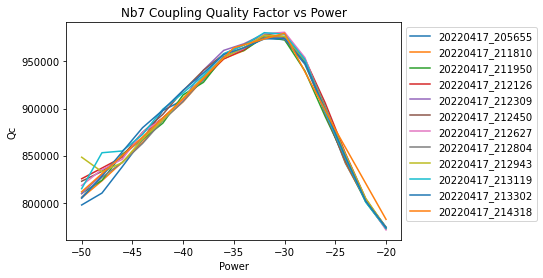

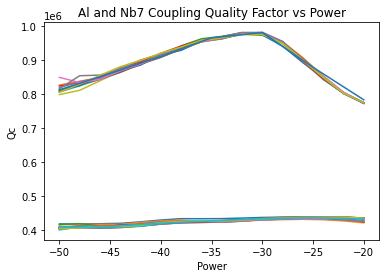

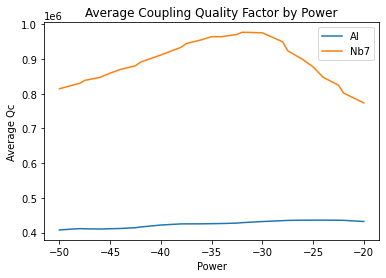

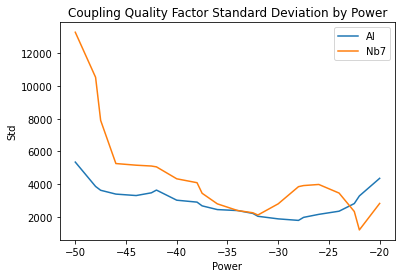

In [7]:
#Plot Al
Qc_df.T.reset_index().set_index('level_0').interpolate(method='index').plot(y=Al)
plt.xlabel("Power")
plt.ylabel("Qc")
plt.title("Al Coupling Quality Factor vs Power")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

#plot Nb
Qc_df.T.reset_index().set_index('level_0').interpolate(method='index').plot(y=Nb7)
plt.xlabel("Power")
plt.ylabel("Qc")
plt.title("Nb7 Coupling Quality Factor vs Power")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

#plot both
Qc_df.T.reset_index().set_index('level_0').interpolate(method='index').plot(legend=None)
plt.xlabel("Power")
plt.ylabel("Qc")
plt.title("Al and Nb7 Coupling Quality Factor vs Power")
plt.show()

#plot averages
ax = Qc_df.loc[Al].describe().T.reset_index().set_index('level_0').interpolate().plot(y='mean', label='Al')
Qc_df.loc[Nb7].describe().T.reset_index().set_index('level_0').interpolate().plot(ax=ax, y='mean', label = 'Nb7')
plt.legend(loc='best')
plt.xlabel("Power")
plt.ylabel("Average Qc")
plt.title("Average Coupling Quality Factor by Power")
plt.show()

#plot std
ax = Qc_df.loc[Al].describe().T.reset_index().set_index('level_0').interpolate().plot(y='std', label='Al')
Qc_df.loc[Nb7].describe().T.reset_index().set_index('level_0').interpolate().plot(ax=ax, y='std', label = 'Nb7')
plt.legend(loc='best')
plt.xlabel("Power")
plt.ylabel("Std")
plt.title("Coupling Quality Factor Standard Deviation by Power")
plt.show()

In [8]:
freq_df.loc[Nb7].describe()


,-50.0,-48.0,-47.5,-46.0,-45.0,-44.0,-42.5,-42.0,-40.0,-38.0,...,-32.0,-30.0,-28.0,-27.5,-26.0,-25.0,-24.0,-22.5,-22.0,-20.0
count,1.200000e+01,1.100000e+01,0.0,1.100000e+01,1.000000,1.100000e+01,0.0,1.100000e+01,1.200000e+01,1.100000e+01,...,1.100000e+01,1.200000e+01,1.100000e+01,0.0,1.100000e+01,1.000000,1.100000e+01,0.0,1.100000e+01,1.200000e+01
mean,4.244763e+00,4.244763e+00,NaN,4.244763e+00,4.244763,4.244763e+00,NaN,4.244763e+00,4.244763e+00,4.244763e+00,...,4.244763e+00,4.244763e+00,4.244763e+00,NaN,4.244763e+00,4.244763,4.244763e+00,NaN,4.244762e+00,4.244762e+00
std,7.491483e-08,1.164319e-07,NaN,7.917813e-08,NaN,5.679681e-08,NaN,4.056629e-08,3.978316e-08,3.430212e-08,...,1.646499e-08,1.607584e-08,1.589419e-08,NaN,8.745359e-09,NaN,8.931877e-09,NaN,6.778624e-09,1.846518e-08
min,4.244763e+00,4.244763e+00,NaN,4.244763e+00,4.244763,4.244763e+00,NaN,4.244763e+00,4.244763e+00,4.244763e+00,...,4.244763e+00,4.244763e+00,4.244763e+00,NaN,4.244763e+00,4.244763,4.244763e+00,NaN,4.244762e+00,4.244762e+00
25%,4.244763e+00,4.244763e+00,NaN,4.244763e+00,4.244763,4.244763e+00,NaN,4.244763e+00,4.244763e+00,4.244763e+00,...,4.244763e+00,4.244763e+00,4.244763e+00,NaN,4.244763e+00,4.244763,4.244763e+00,NaN,4.244762e+00,4.244762e+00
50%,4.244763e+00,4.244763e+00,NaN,4.244763e+00,4.244763,4.244763e+00,NaN,4.244763e+00,4.244763e+00,4.244763e+00,...,4.244763e+00,4.244763e+00,4.244763e+00,NaN,4.244763e+00,4.244763,4.244763e+00,NaN,4.244762e+00,4.244762e+00
75%,4.244763e+00,4.244763e+00,NaN,4.244763e+00,4.244763,4.244763e+00,NaN,4.244763e+00,4.244763e+00,4.244763e+00,...,4.244763e+00,4.244763e+00,4.244763e+00,NaN,4.244763e+00,4.244763,4.244763e+00,NaN,4.244762e+00,4.244762e+00
max,4.244763e+00,4.244763e+00,NaN,4.244763e+00,4.244763,4.244763e+00,NaN,4.244763e+00,4.244763e+00,4.244763e+00,...,4.244763e+00,4.244763e+00,4.244763e+00,NaN,4.244763e+00,4.244763,4.244763e+00,NaN,4.244762e+00,4.244762e+00


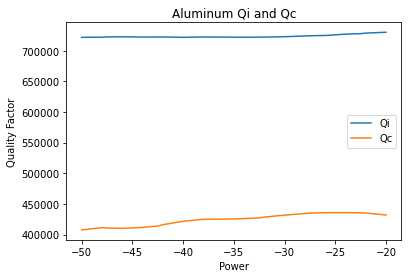

In [9]:
ax = Qi_df.loc[Al].describe().T.reset_index().set_index('level_0').interpolate().plot(y='mean', label='Qi')
Qc_df.loc[Al].describe().T.reset_index().set_index('level_0').interpolate().plot(ax=ax, y='mean', label = 'Qc')
plt.legend(loc='best')
plt.xlabel("Power")
plt.ylabel("Quality Factor")
plt.title("Aluminum Qi and Qc")
plt.show()

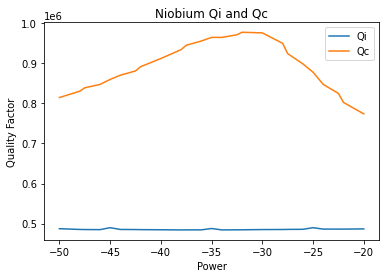

In [10]:
ax = Qi_df.loc[Nb7].describe().T.reset_index().set_index('level_0').interpolate().plot(y='mean', label='Qi')
Qc_df.loc[Nb7].describe().T.reset_index().set_index('level_0').interpolate().plot(ax=ax, y='mean', label = 'Qc')
plt.legend(loc='best')
plt.xlabel("Power")
plt.ylabel("Quality Factor")
plt.title("Niobium Qi and Qc")
plt.show()